In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D
from tensorflow.keras.metrics import RootMeanSquaredError

# Load data

In [2]:
# load data
df = pd.read_csv('weathers.csv')
df.columns

Index(['Date', 'Average temperature', 'Average dewpoint', 'Average windspeed',
       'Average direction', 'Rainfall for year', 'Maximum temperature',
       'Maximum humidity', 'Maximum pressure', 'Maximum windspeed ',
       'Maximum heat index', 'Average humidity', 'Average barometer',
       'Average gustspeed', 'Rainfall for month', 'Maximum rain per minute',
       'Minimum temperature', 'Minimum humidity', 'Minimum pressure',
       'Maximum gust speed'],
      dtype='object')

# Lọc ra những cột cần thiết

In [3]:
cols = ['Date', 'Average temperature', 'Average dewpoint', 'Average windspeed', 'Average direction', 
           'Average humidity', 'Average barometer','Average gustspeed', 'Rainfall for month']
df = df[cols]
df[:5]

Date  Average temperature  Average dewpoint  Average windspeed  \
0  1/01/2015                  8.1              -2.1                1.2   
1  2/01/2015                 61.0              30.1                4.8   
2  3/01/2015                 24.2              10.1                7.4   
3  4/01/2015                 47.0              30.3               18.0   
4  5/01/2015                 38.9              21.9               20.7   

   Average direction  Average humidity  Average barometer  Average gustspeed  \
0              28.00              65.0               30.4                2.3   
1               0.01               8.6                3.1              275.0   
2             242.00              56.0               29.9               10.9   
3               0.01               8.7               11.3              237.0   
4             247.00              50.0               30.0               30.8   

   Rainfall for month  
0                0.01  
1                0.01  
2                0.01  
3                0.01  
4                0.02

In [4]:
# điền vào các giá trị nan với phương thức là bfill
df = df.fillna(method='bfill')
df.shape

(2430, 9)

In [5]:
# Chuyển cột ngày tháng theo đúng format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# sau đó set index lại là ngày tháng
df_index = df.set_index(['Date'])
df_index.head()

Average temperature  Average dewpoint  Average windspeed  \
Date                                                                   
2015-01-01                  8.1              -2.1                1.2   
2015-01-02                 61.0              30.1                4.8   
2015-01-03                 24.2              10.1                7.4   
2015-01-04                 47.0              30.3               18.0   
2015-01-05                 38.9              21.9               20.7   

            Average direction  Average humidity  Average barometer  \
Date                                                                 
2015-01-01              28.00              65.0               30.4   
2015-01-02               0.01               8.6                3.1   
2015-01-03             242.00              56.0               29.9   
2015-01-04               0.01               8.7               11.3   
2015-01-05             247.00              50.0               30.0   

            Average gustspeed  Rainfall for month  
Date                                               
2015-01-01                2.3                0.01  
2015-01-02              275.0                0.01  
2015-01-03               10.9                0.01  
2015-01-04              237.0                0.01  
2015-01-05               30.8                0.02

In [6]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2430 entries, 2015-01-01 to 2021-12-31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average temperature  2430 non-null   float64
 1   Average dewpoint     2430 non-null   float64
 2   Average windspeed    2430 non-null   float64
 3   Average direction    2430 non-null   float64
 4   Average humidity     2430 non-null   float64
 5   Average barometer    2430 non-null   float64
 6   Average gustspeed    2430 non-null   float64
 7   Rainfall for month   2430 non-null   float64
dtypes: float64(8)
memory usage: 170.9 KB


In [7]:
n_features = len(df_index.columns)

In [8]:
df_index.describe()

Average temperature  Average dewpoint  Average windspeed  \
count          2430.000000       2430.000000        2430.000000   
mean             47.297325         26.807366           6.572222   
std              16.759421         10.662671           4.788504   
min              -3.500000        -10.900000           0.000000   
25%              35.000000         22.800000           3.100000   
50%              47.000000         29.800000           5.000000   
75%              59.800000         30.100000           9.000000   
max              94.000000         54.700000          33.700000   

       Average direction  Average humidity  Average barometer  \
count        2430.000000       2430.000000        2430.000000   
mean          108.399996         37.184074          17.801235   
std           124.573982         21.011380          12.575560   
min             0.000000        -16.800000           0.000000   
25%             0.260000         21.900000           4.100000   
50%            17.000000         36.200000          29.400000   
75%           245.000000         49.475000          29.800000   
max           360.000000         93.000000          30.800000   

       Average gustspeed  Rainfall for month  
count        2430.000000         2430.000000  
mean          109.774691            2.846687  
std           121.791437            3.868943  
min             0.000000            0.000000  
25%             6.000000            0.130000  
50%            19.150000            0.780000  
75%           245.750000            5.030000  
max           360.000000           14.960000

# Vẽ biểu đồ trực quan hóa dữ liệu

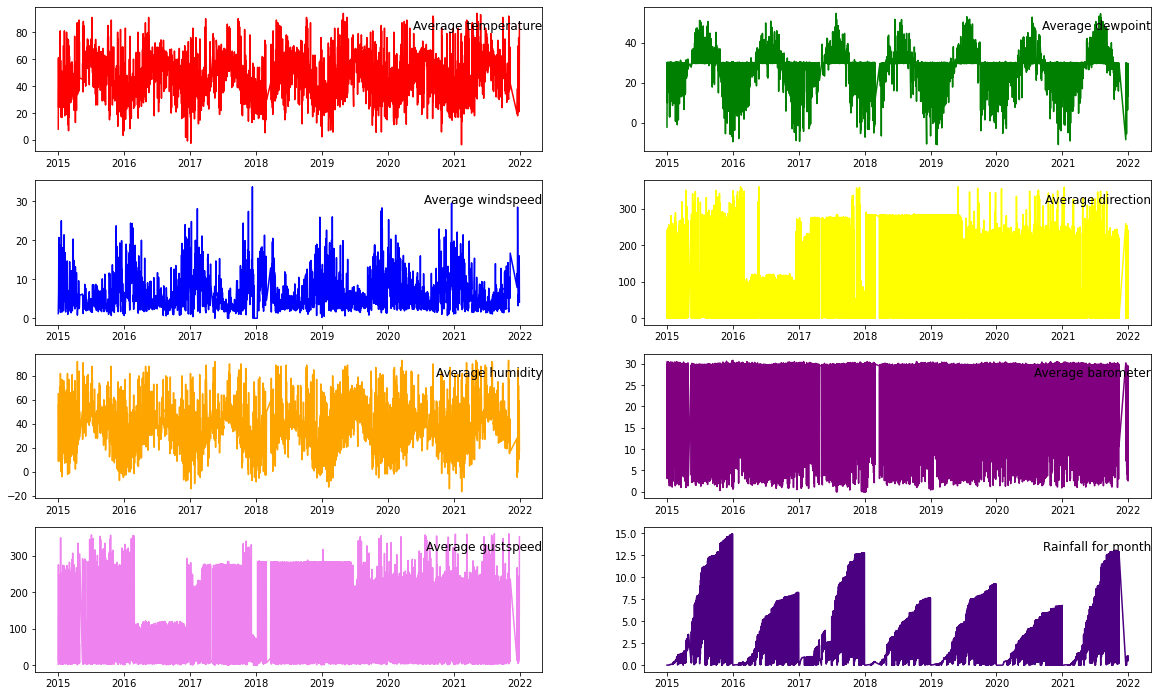

In [9]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'violet', 'indigo']

plt.figure(figsize=(20,25))
for i, column in enumerate(df_index.columns):
    plt.subplot(len(df_index.columns),2,i+1)    
    plt.plot(df_index[column], color=colors[i])
    plt.title(column,loc='right',y=0.8)
plt.show()

# Chuẩn hóa dữ liệu

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_index)

data = scaler.transform(df_index)
data

array([[-2.33930469, -2.71163921, -1.1221308 , ...,  1.00205146,
        -0.8826303 , -0.73334531],
       [ 0.81777855,  0.30886365, -0.37017552, ..., -1.16927279,
         1.35690423, -0.73334531],
       [-1.37845327, -1.56722508,  0.1729033 , ...,  0.96228362,
        -0.81200325, -0.73334531],
       ...,
       [ 0.5790577 ,  0.27134188,  1.1546227 , ..., -0.75568722,
         1.02019387, -0.46706792],
       [-1.25312483, -1.25767044,  1.96924093, ...,  0.93046934,
        -0.71181138, -0.60666966],
       [ 2.36946408,  0.25258099, -0.51638905, ..., -1.20904063,
         1.98926272, -0.46706792]])

# Chia dữ liệu

#### train(70%), validate(20%), test(10%)

In [11]:
n = len(data)

train = data[0:int(n*0.7)]
val = data[int(n*0.7):int(n*0.9)]
test = data[int(n*0.9):]

train.shape, val.shape, test.shape

((1701, 8), (486, 8), (243, 8))

#### Lấy các điểm thời gian tương ứng với dữ liệu đã chia

In [12]:
train_dates = df_index.index[0:int(n*0.7)]
val_dates = df_index.index[int(n*0.7):int(n*0.9)]
test_dates = df_index.index[int(n*0.9):]

train_dates.shape, val_dates.shape, test_dates.shape

((1701,), (486,), (243,))

#### Tạo dữ liệu theo kiểu timeseries

In [13]:
def generate_timeseries_data(sequence_data, look_back=7):
    X = []
    y = []
    for i in range(len(sequence_data) - look_back):
        X.append(sequence_data[i:i+look_back])
        y.append(sequence_data[i+look_back])
    return X, y

## Note: chúng ta có thể sử dụng 2 cách dự đoán đầu ra cho bài toán time series
- Đầu tiên là dự đoán tuần tự, ta dùng n ngày trước để dự đoán 1 ngày tiếp theo, sau đó ta nối ngày dự đoán đó vào n-1 ngày trước để dự đoán tiếp tục (đang áp dụng)
- thứ hai là tự đoán theo 1 batch, tức là đầu ra lúc này sẽ là n ngày tiếp theo

In [14]:
# sử dụng n_input ngày trước để dự đoán 1 ngày tiếp theo
n_input = 7 

train_series = generate_timeseries_data(train, look_back=n_input)
val_series = generate_timeseries_data(val, look_back=n_input)
test_series = generate_timeseries_data(test, look_back=n_input)

In [15]:
X_train = np.asarray(train_series[0])
y_train =  np.asarray(train_series[1])

X_val =  np.asarray(val_series[0])
y_val =  np.asarray(val_series[1])

X_test =  np.asarray(test_series[0])
y_test =  np.asarray(test_series[1])

# Định nghĩa các hàm Vẽ đồ thị để đánh giá model

In [16]:
def plot_loss_mse(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history['loss'], label='Training loss')
    axs[0].plot(history.history['val_loss'], label='Validation loss')
    axs[0].legend()

    axs[1].plot(history.history['root_mean_squared_error'], label='Training root mean square error')
    axs[1].plot(history.history['val_root_mean_squared_error'], label='Validation root mean square error')
    axs[1].legend()

    plt.show()

In [17]:
def plot_evaluate_model(predict_data, actual_data, date, model, name_title = df_index.columns):
    pred = model.predict(predict_data)

    pred = scaler.inverse_transform(pred)
    actual = scaler.inverse_transform(actual_data)
    
    pred_df = pd.DataFrame(pred, columns=name_title.values.tolist(), index=date)
    actual_df = pd.DataFrame(actual, columns=name_title.values.tolist(), index=date) 
    
    index = 1
    plt.figure(figsize=(30,60))
    for name in name_title:
        plt.subplot(len(name_title),2,index)
        plt.title(name)
        plt.plot(actual_df[name], label='actual')
        plt.plot(pred_df[name], label='predict')
        plt.legend()
        index +=1
    plt.show()

In [18]:
def plot_forecasting(model, X, y, date, n_future=14, n_past=86, name_title = df_index.columns):
    predicts = []
    lastest_data = X_train[-1:]

    for i in range(n_future):        
        pred = model.predict(lastest_data)
        predicts.append(pred[0])

        next_data_to_pred = lastest_data[:,1:,:]   # xóa giá trị đầu tiên        
        lastest_data = np.append(next_data_to_pred, [pred],axis=1)


    past = y[-n_past:]
    future = np.concatenate((past,np.array(predicts)), axis = 0)
    # chuyển về thành dữ liệu giá trị thực tế trước khi scale
    past = scaler.inverse_transform(past)
    future = scaler.inverse_transform(future)

    past_dates = date[-n_past:]
    future_dates = pd.date_range(list(date)[-n_past], periods=(n_future+n_past), freq='D').tolist()

    past_df = pd.DataFrame(past, columns=name_title.values.tolist(), index=past_dates) 
    future_df = pd.DataFrame(future, columns=name_title.values.tolist(), index=future_dates)
    
    
    index = 1
    plt.figure(figsize=(30,60))
    for name in name_title:
        plt.subplot(len(name_title),2,index)
        plt.title(name)
        plt.plot(future_df[name], label='future')
        plt.plot(past_df[name], label='past')
        plt.legend()
        index +=1
    plt.show()

# Xây dựng các model

In [19]:
# single lstm
model1 = Sequential([
    LSTM(128, activation='relu', input_shape=(n_input, n_features)),
    Dropout(0.2),
    Dense(n_features)
])

model1.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
model1.summary()

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70144     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
Total params: 71,176
Trainable params: 71,176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
53/53 [==============================] - 4s 23ms/step - loss: 0.7672 - root_mean_squared_error: 0.8759 - val_loss: 0.4558 - val_root_mean_squared_error: 0.6751
Epoch 2/10
53/53 [==============================] - 1s 20ms/step - loss: 0.4389 - root_mean_squared_error: 0.6625 - val_loss: 0.4002 - val_root_m

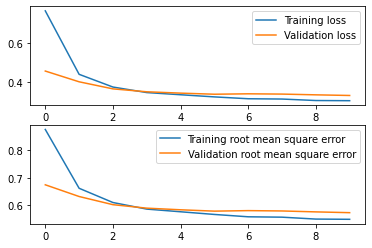

In [20]:
plot_loss_mse(history1)

8/8 [==============================] - 0s 3ms/step


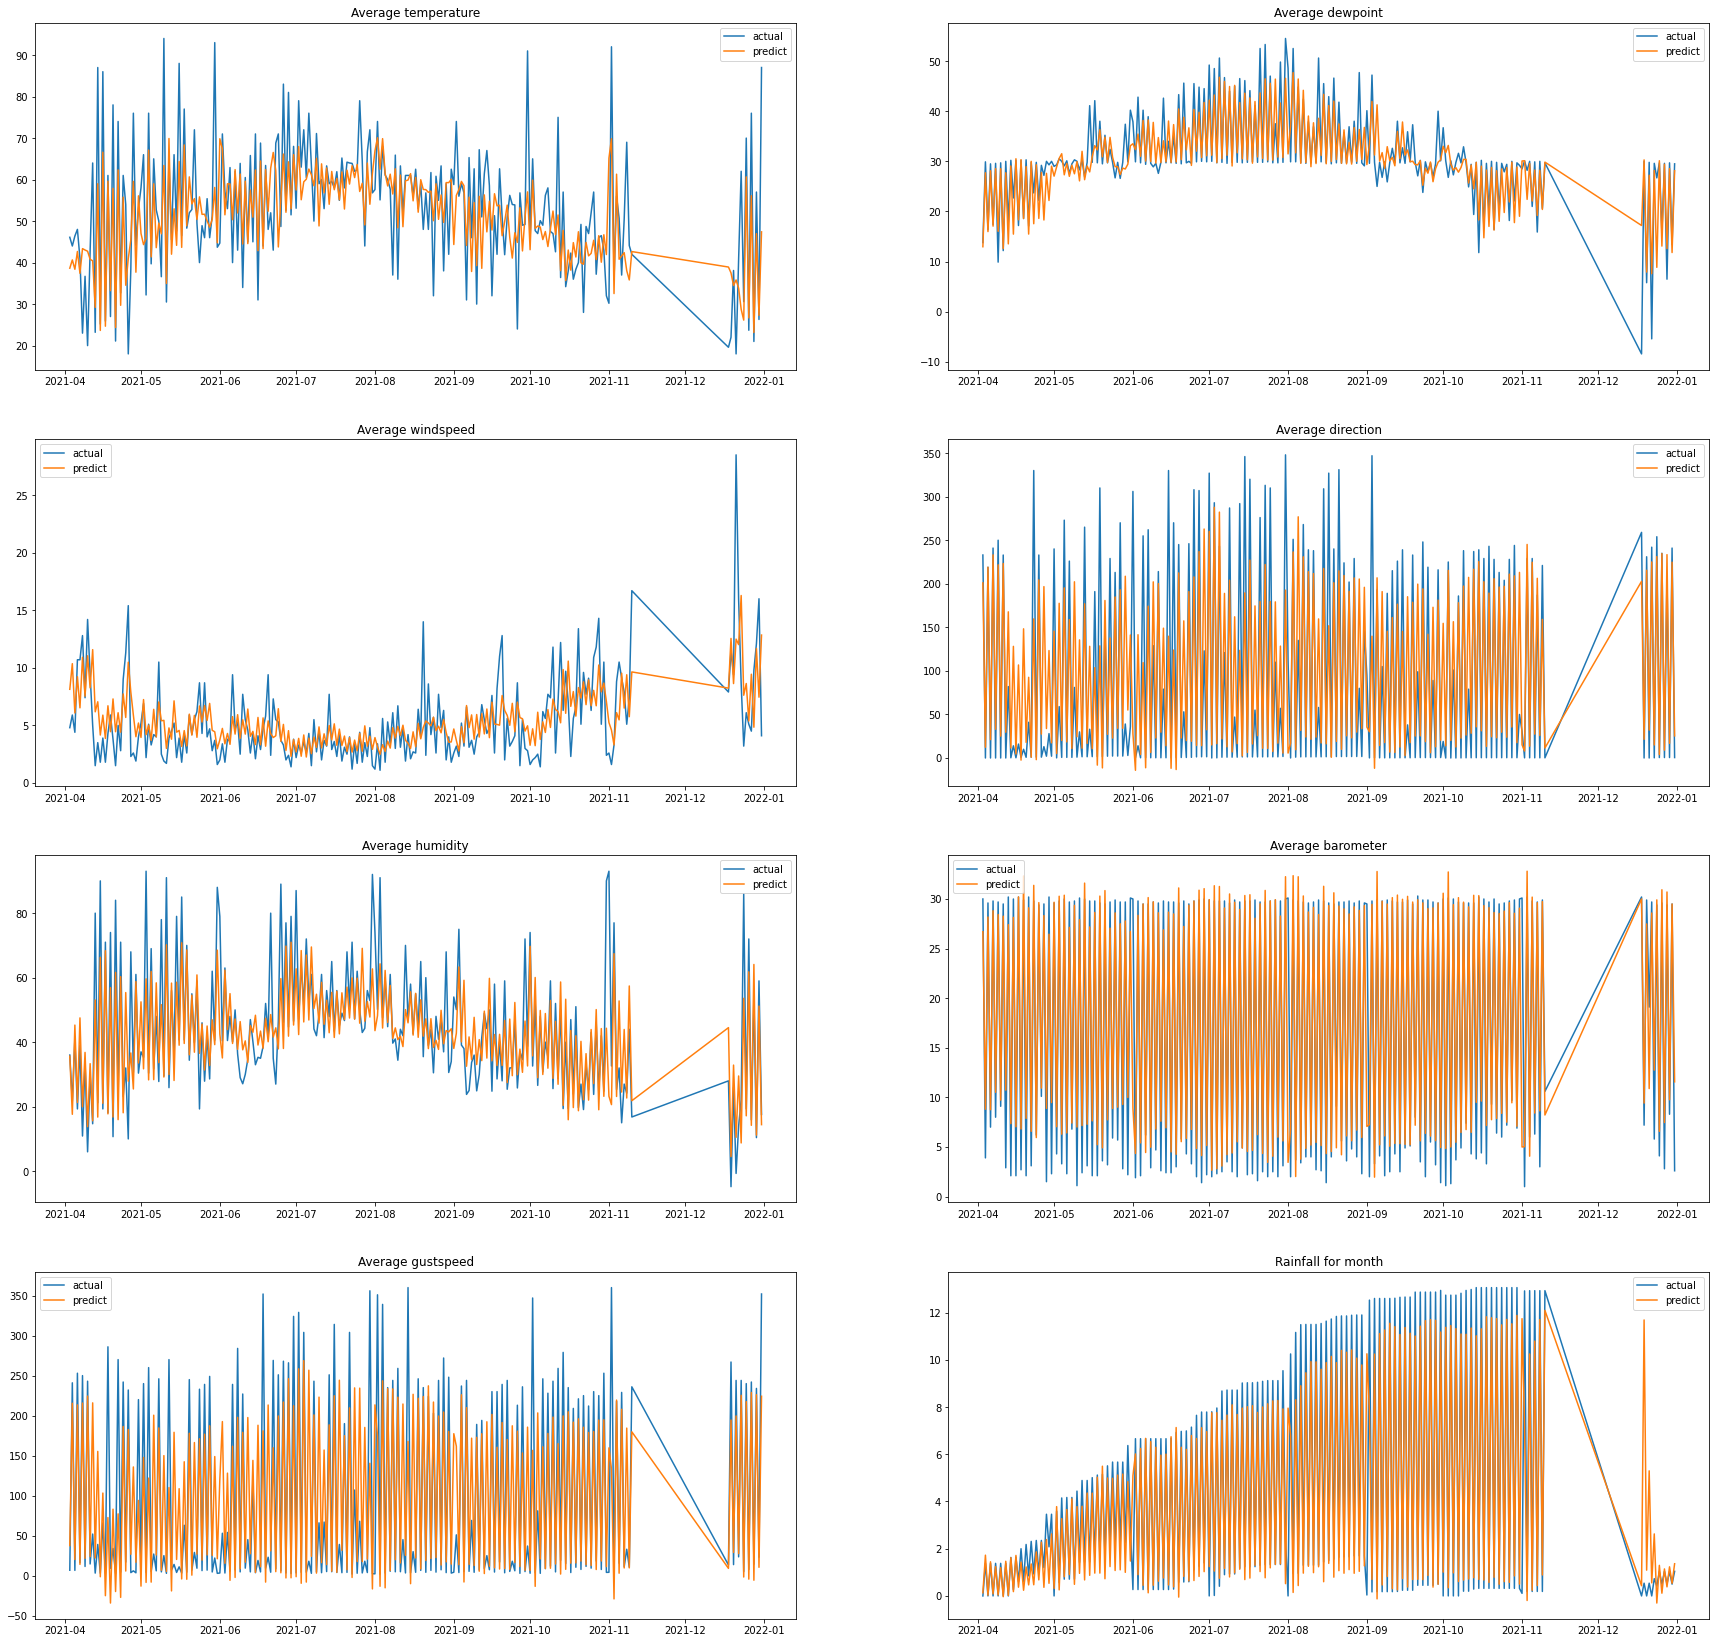

In [21]:
plot_evaluate_model(X_test, y_test, test_dates[n_input:], model1)

1/1 [==============================] - 0s 26ms/step


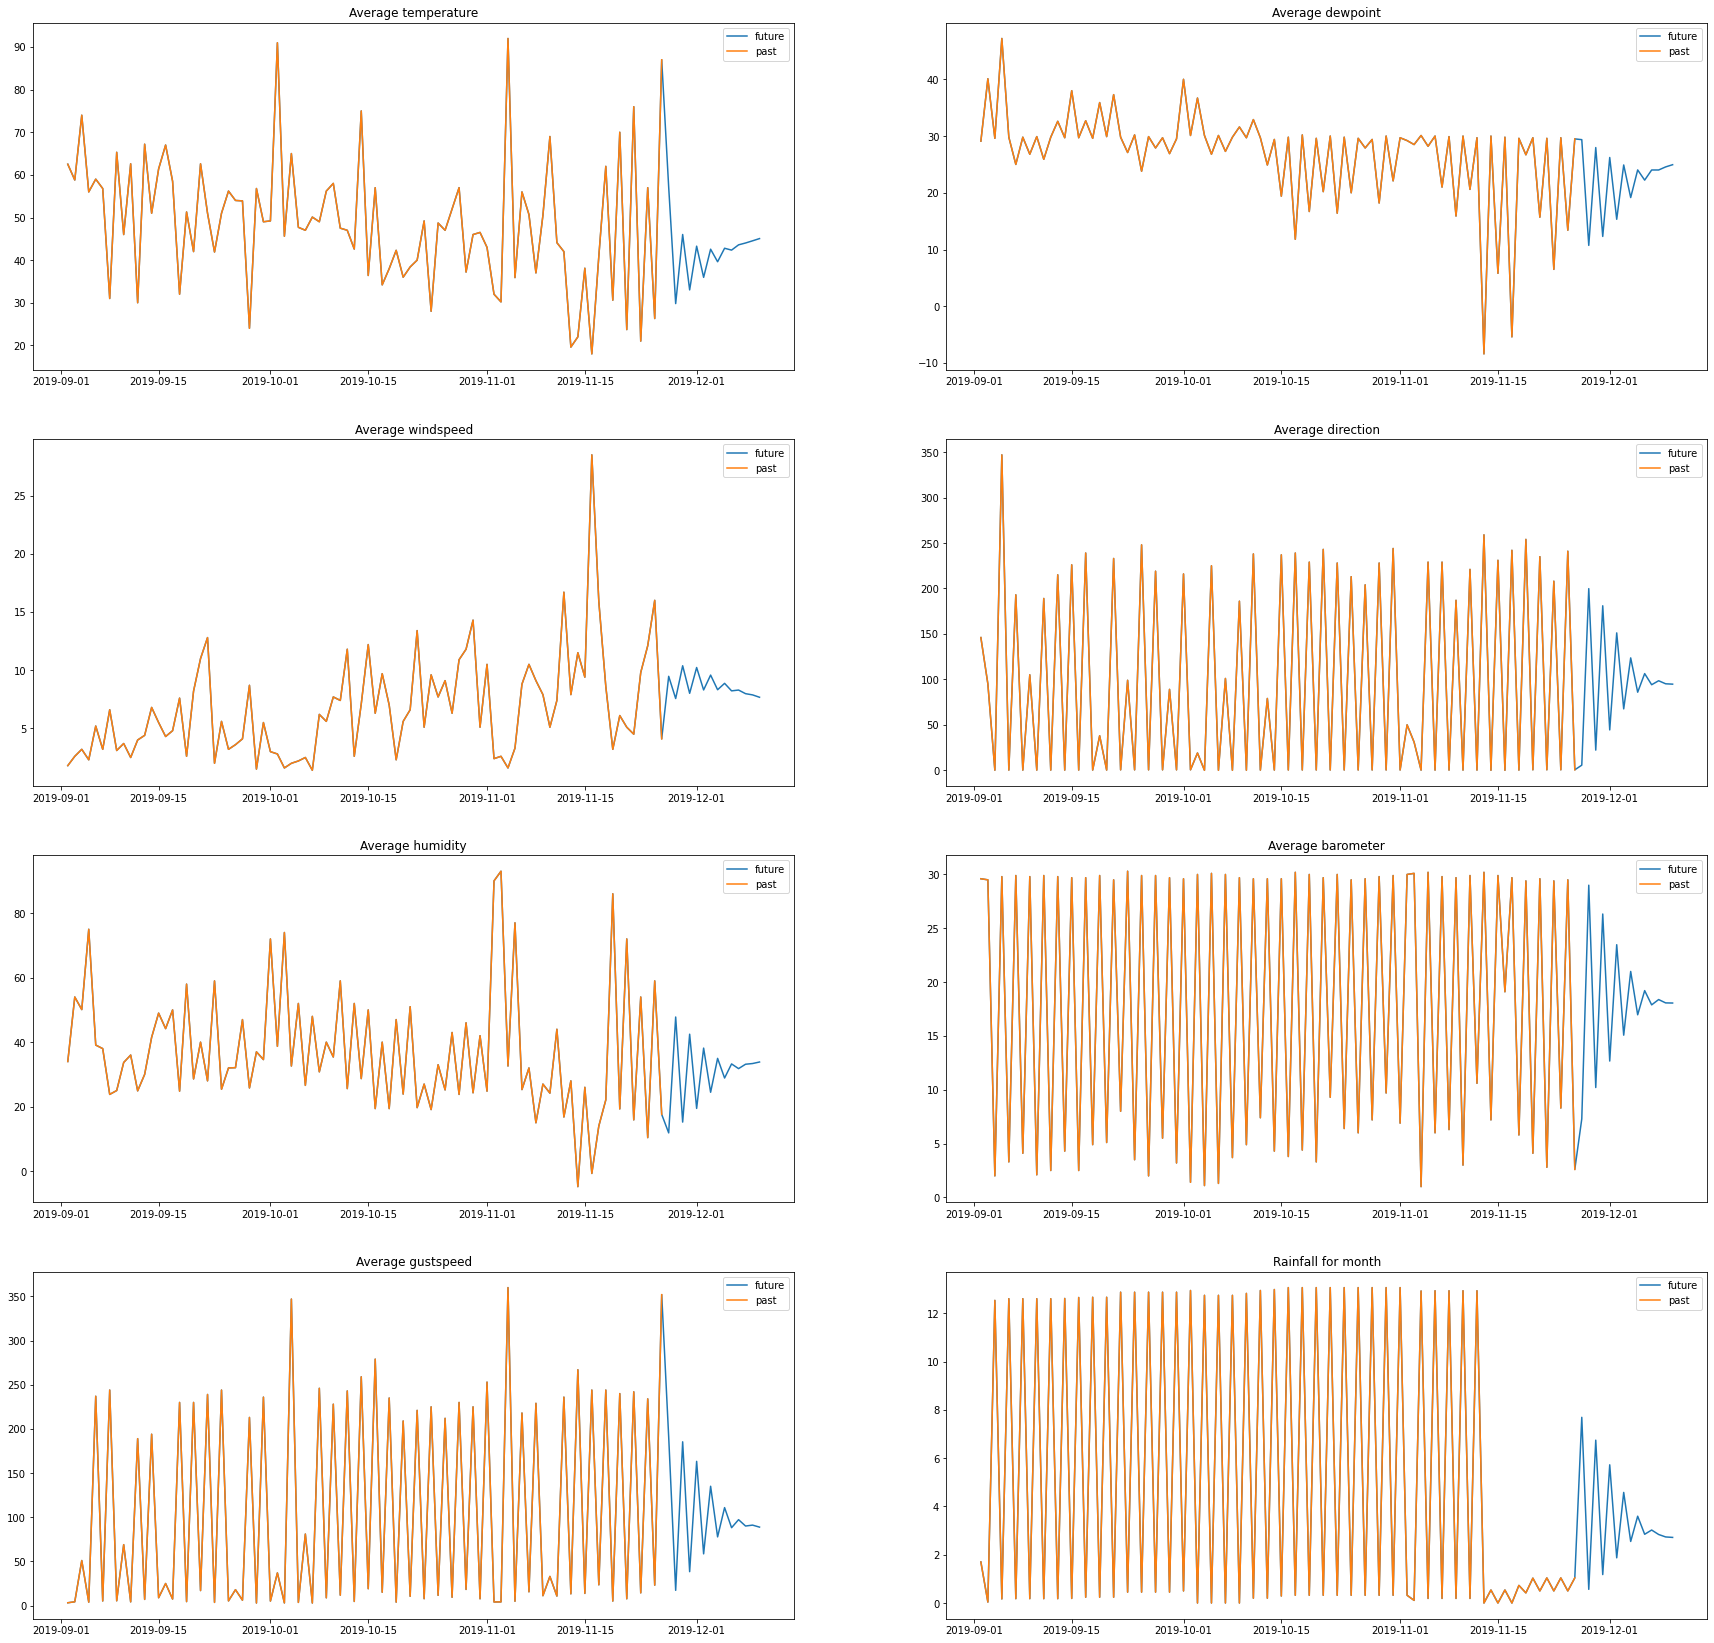

In [22]:
plot_forecasting(model1, X_test, y_test, train_dates[n_input:])

In [23]:
# stack lstm
model2 = Sequential([
    LSTM(128, activation='relu', input_shape=(n_input, n_features), return_sequences=True),
    LSTM(64, activation='relu',return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu',return_sequences=True),
    LSTM(32, activation='relu',return_sequences=False),
    Dropout(0.2),
    Dense(n_features)
])

model2.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
model2.summary()

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 7, 128)            70144     
                                                                 
 lstm_2 (LSTM)               (None, 7, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 7, 64)             33024     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                

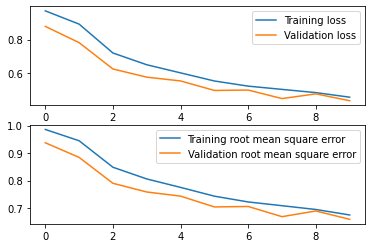

In [24]:
plot_loss_mse(history2)

8/8 [==============================] - 1s 12ms/step


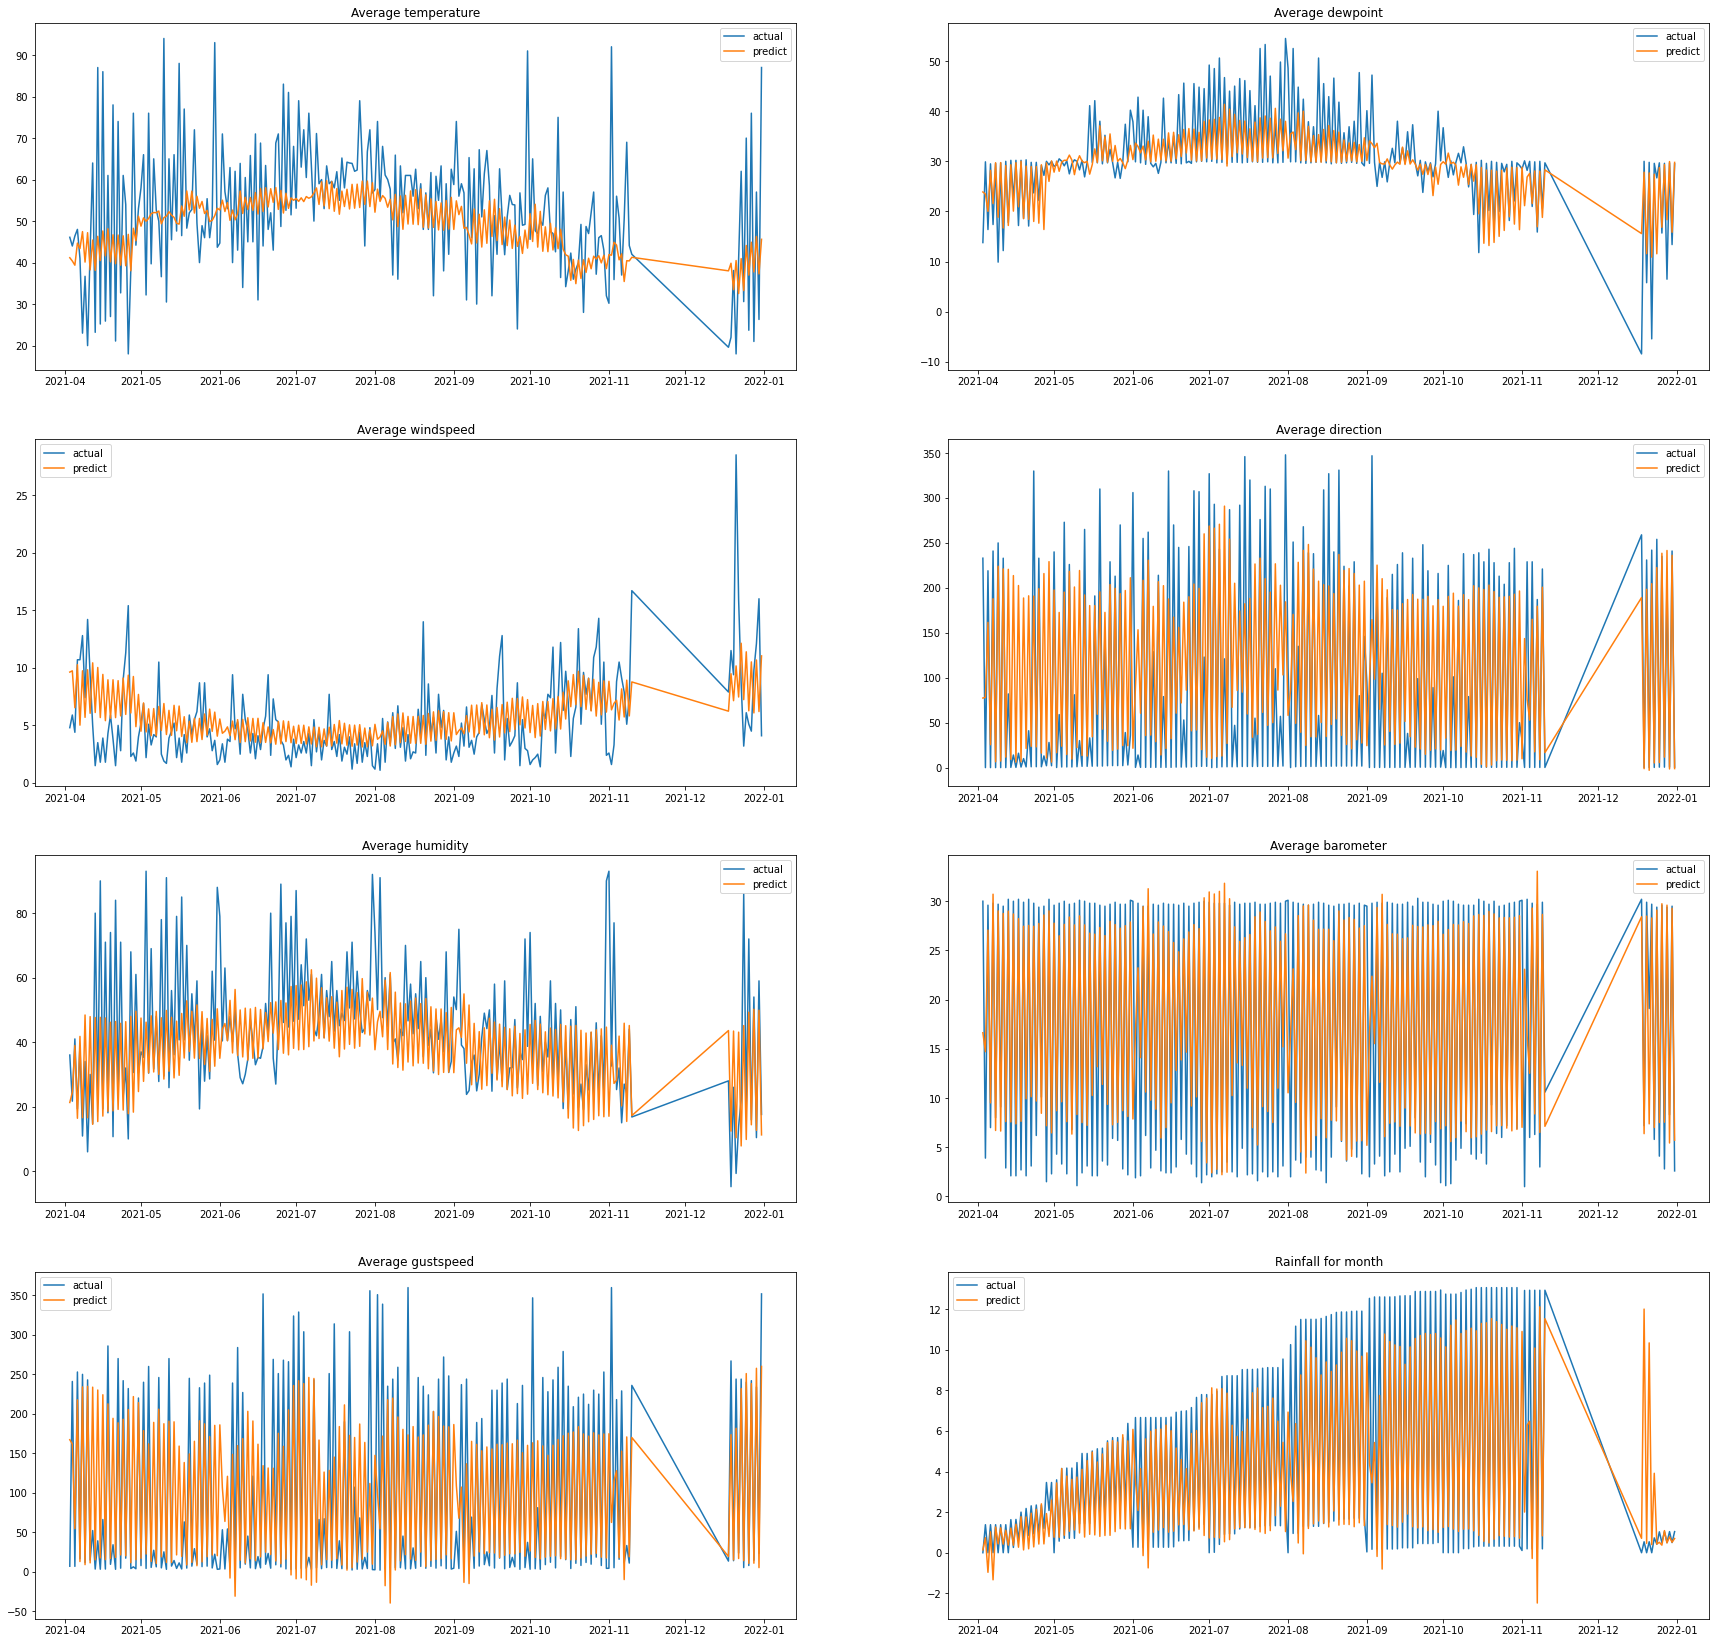

In [25]:
plot_evaluate_model(X_test, y_test, test_dates[n_input:], model2)

1/1 [==============================] - 0s 27ms/step


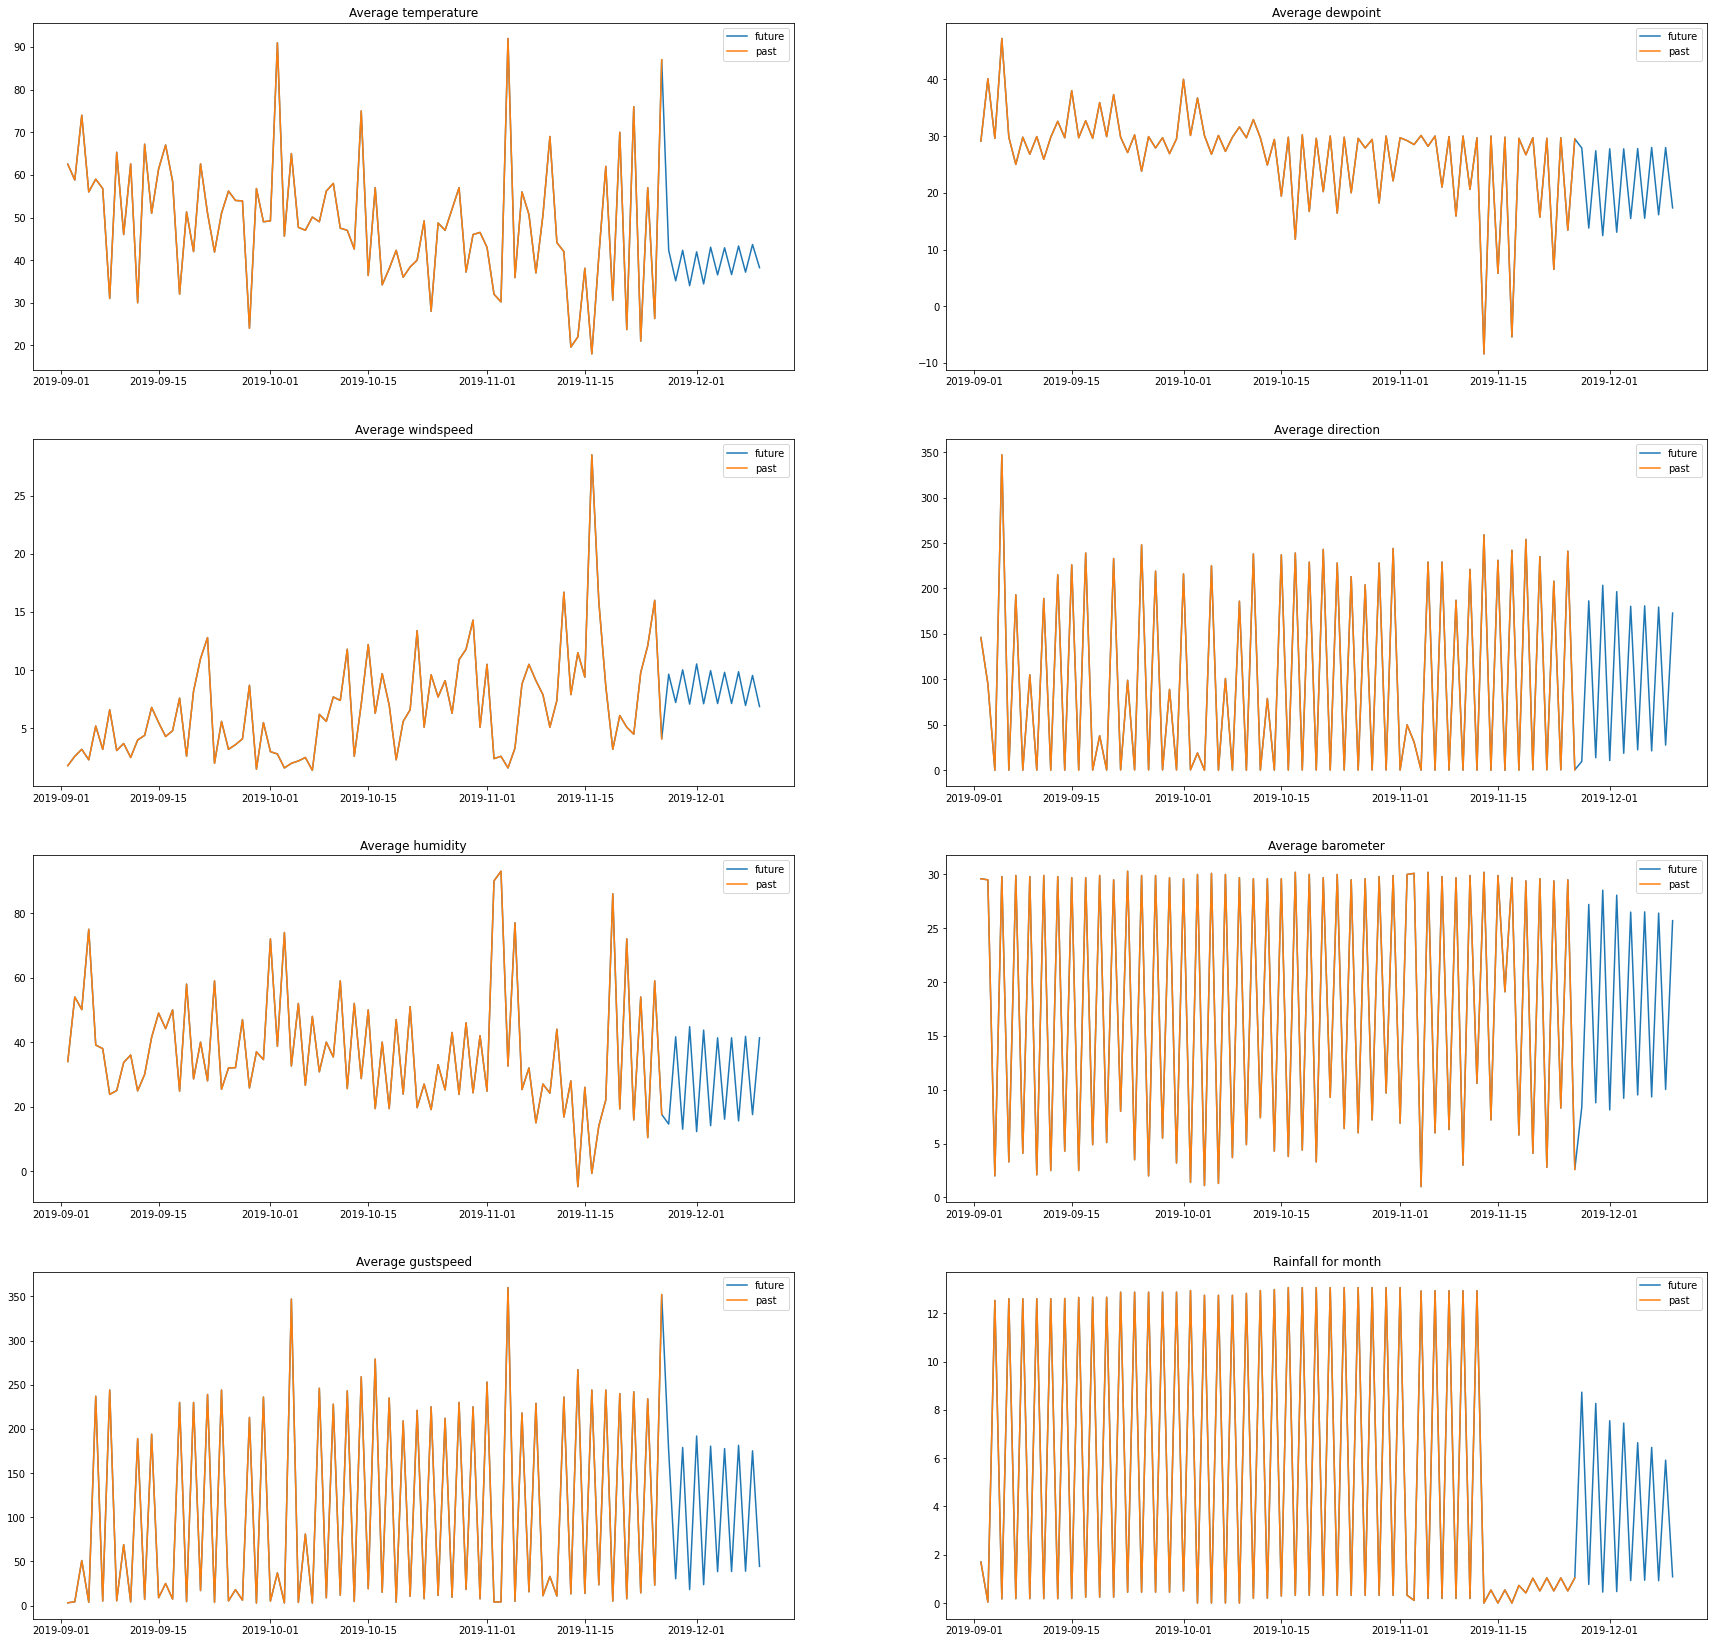

In [26]:
plot_forecasting(model2, X_test, y_test, train_dates[n_input:])

In [27]:
from keras.layers import Bidirectional

In [28]:
# Bidirectional LSTM
model3 = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(n_input, n_features)),
    Dense(n_features)
])

model3.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
model3.summary()

history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              37376     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 38,408
Trainable params: 38,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
53/53 [==============================] - 7s 22ms/step - loss: 0.7755 - root_mean_squared_error: 0.8806 - val_loss: 0.6118 - val_root_mean_squared_error: 0.7822
Epoch 2/10
53/53 [==============================] - 0s 8ms/step - loss: 0.4563 - root_mean_squared_error: 0.6755 - val_loss: 0.4247 - val_root_mean_squared_error: 0.6517
Epoch 3/10
53/53 [=====================

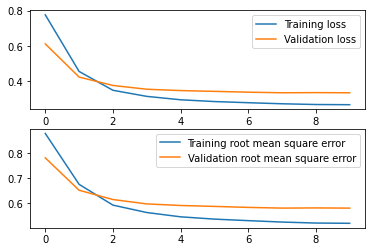

In [29]:
plot_loss_mse(history3)

8/8 [==============================] - 1s 3ms/step


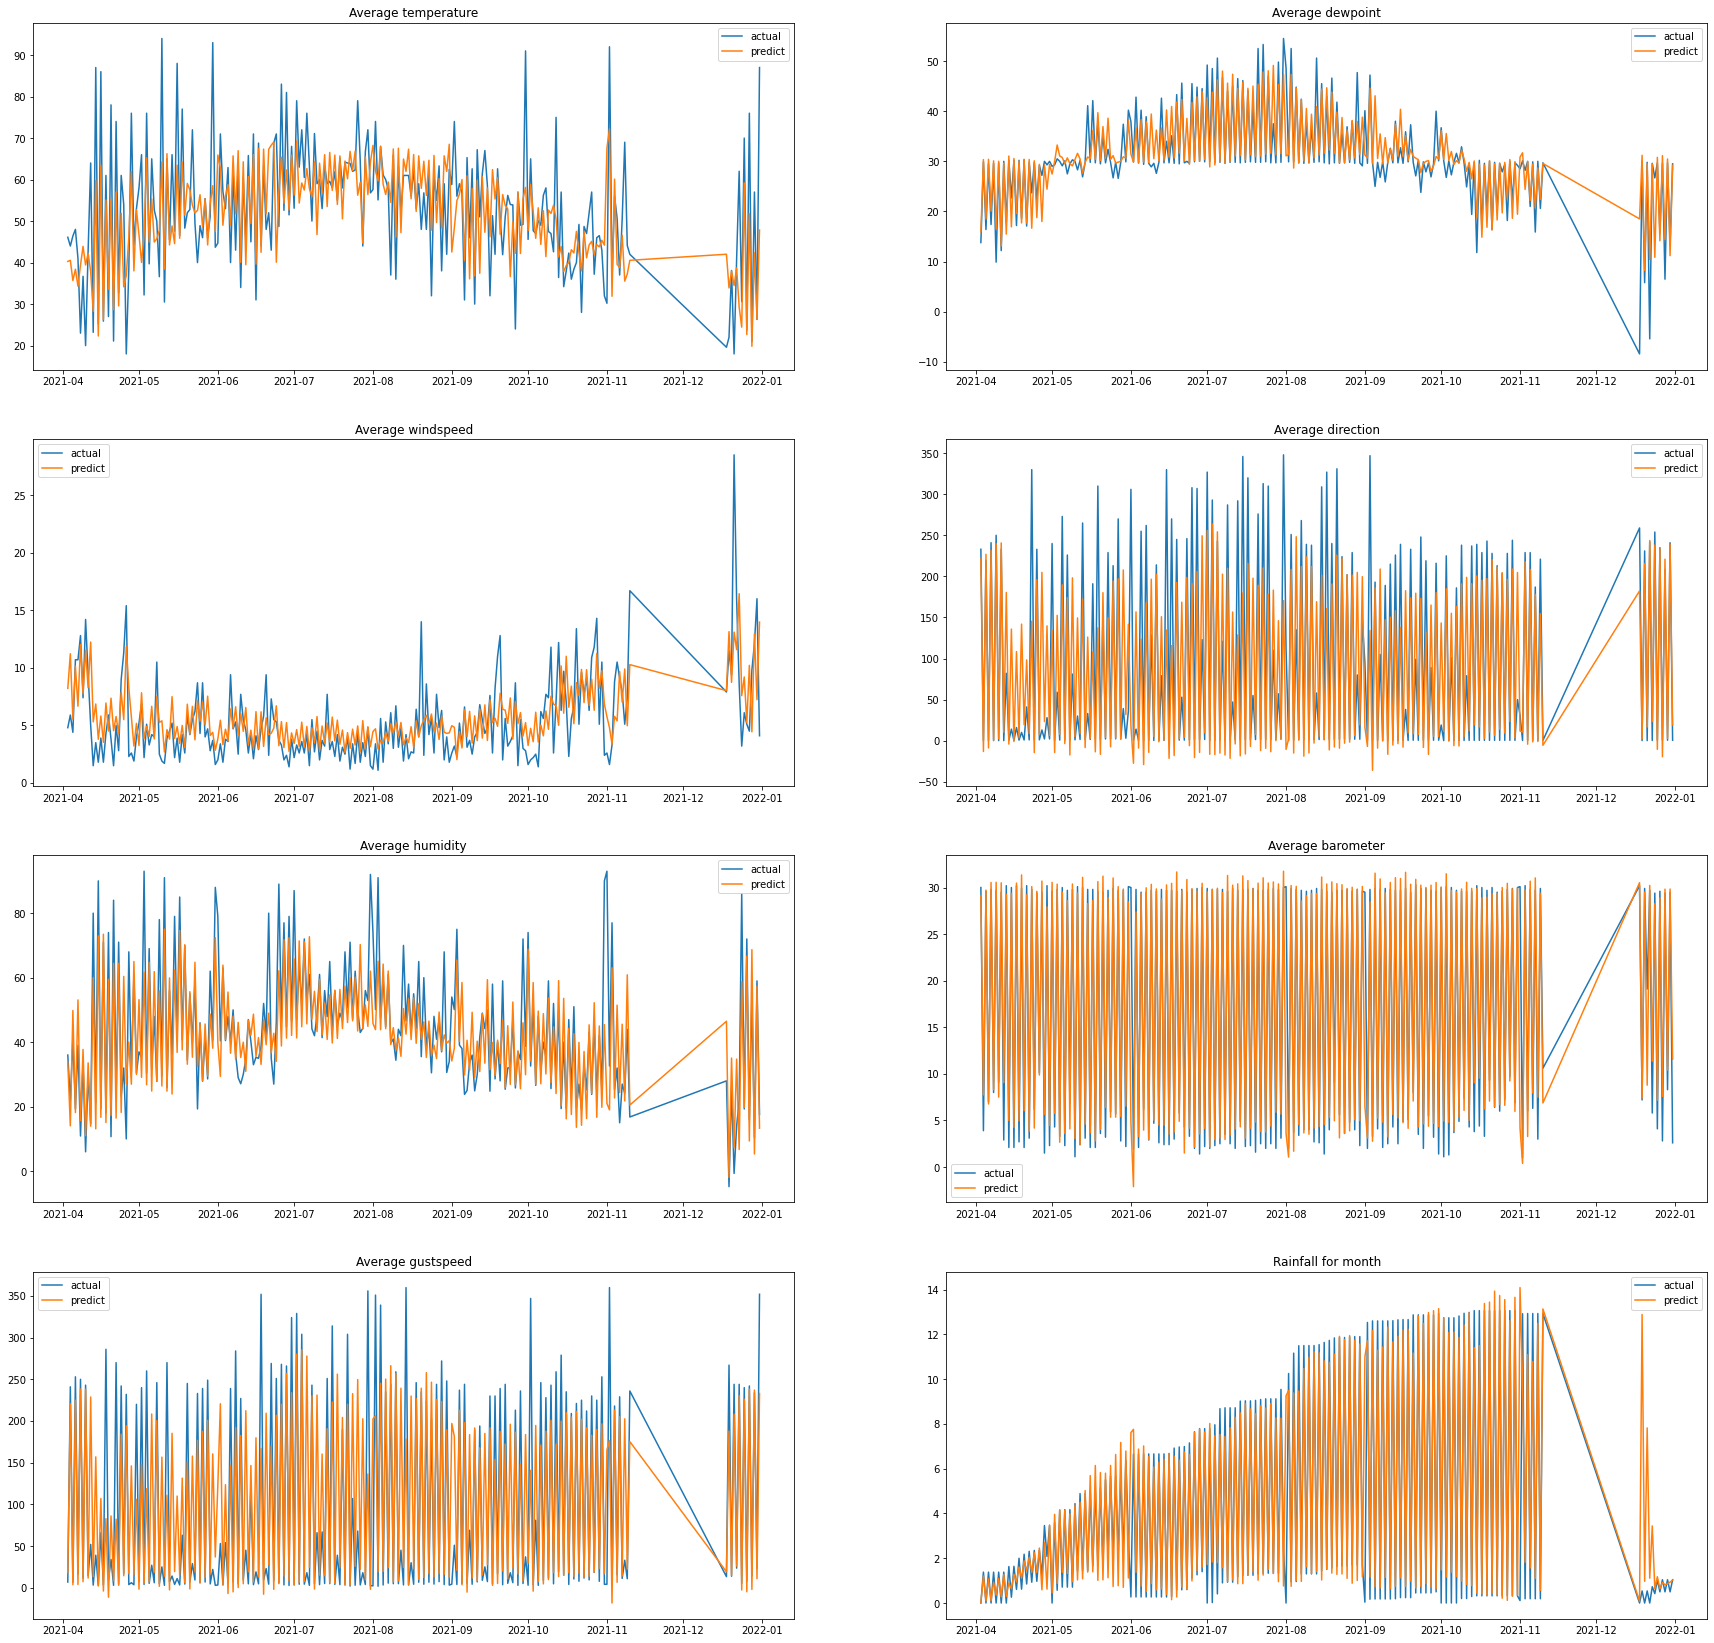

In [30]:
plot_evaluate_model(X_test, y_test, test_dates[n_input:], model3)

1/1 [==============================] - 0s 32ms/step


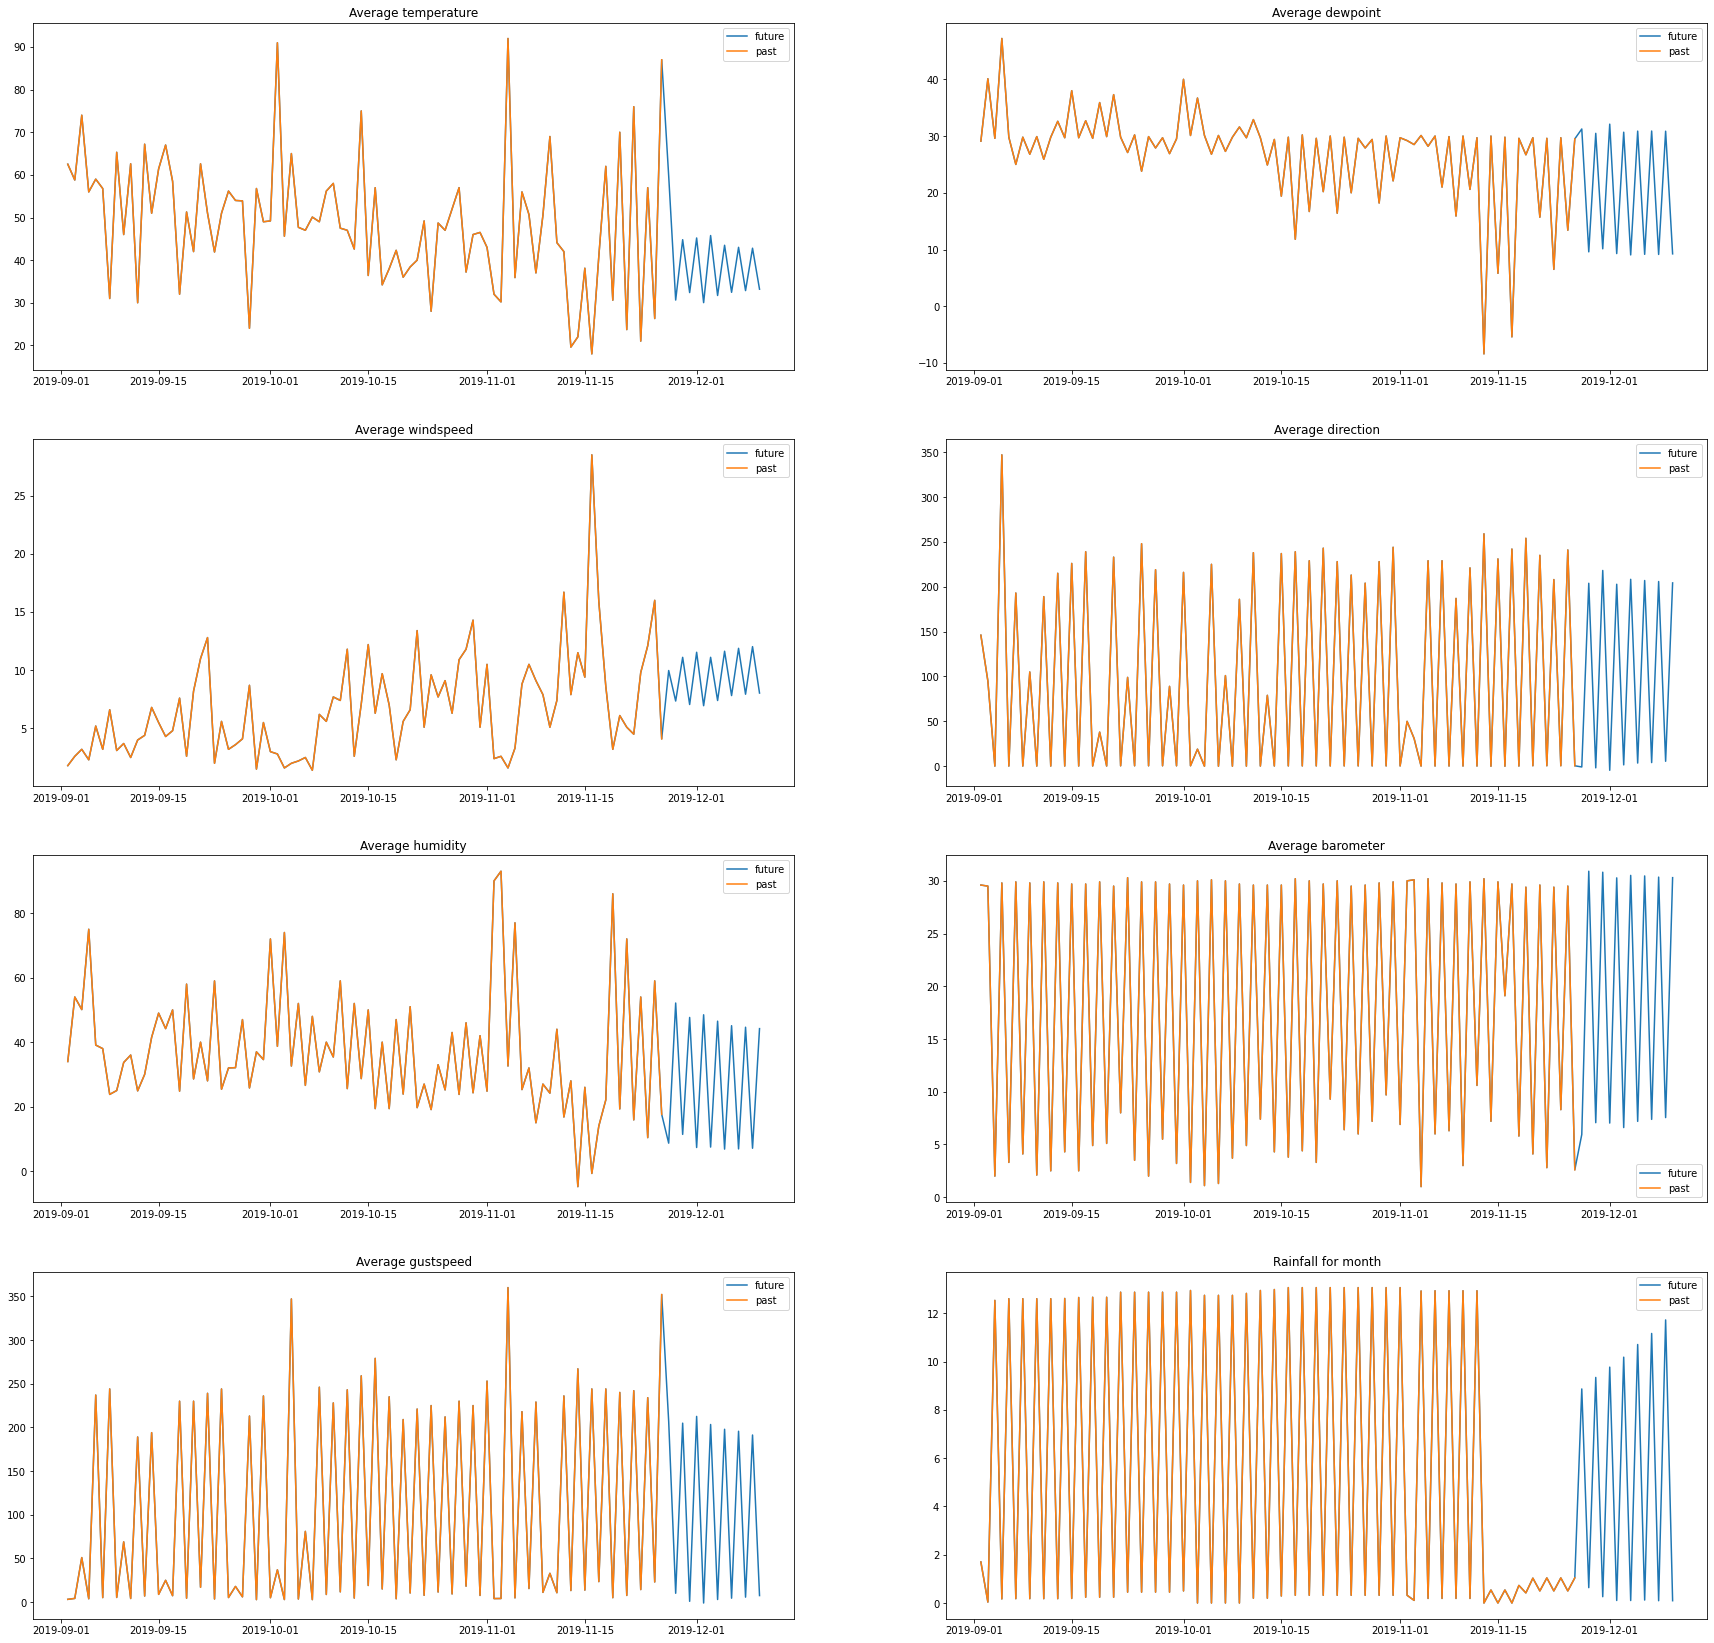

In [31]:
plot_forecasting(model3, X_test, y_test, train_dates[n_input:])

In [32]:
# Bidirectional LSTM
model4 = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(n_input, n_features)),
    LSTM(64, activation='relu',return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu',return_sequences=False),
    Dense(n_features)
])

model4.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
model4.summary()

history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 7, 128)           37376     
 nal)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 7, 64)             49408     
                                                                 
 dropout_3 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
Total params: 99,464
Trainable params: 99,464
Non-trainable params: 0
__________________________________________________

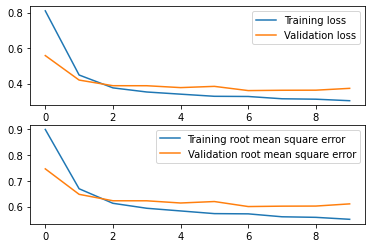

In [33]:
plot_loss_mse(history4)

8/8 [==============================] - 1s 10ms/step


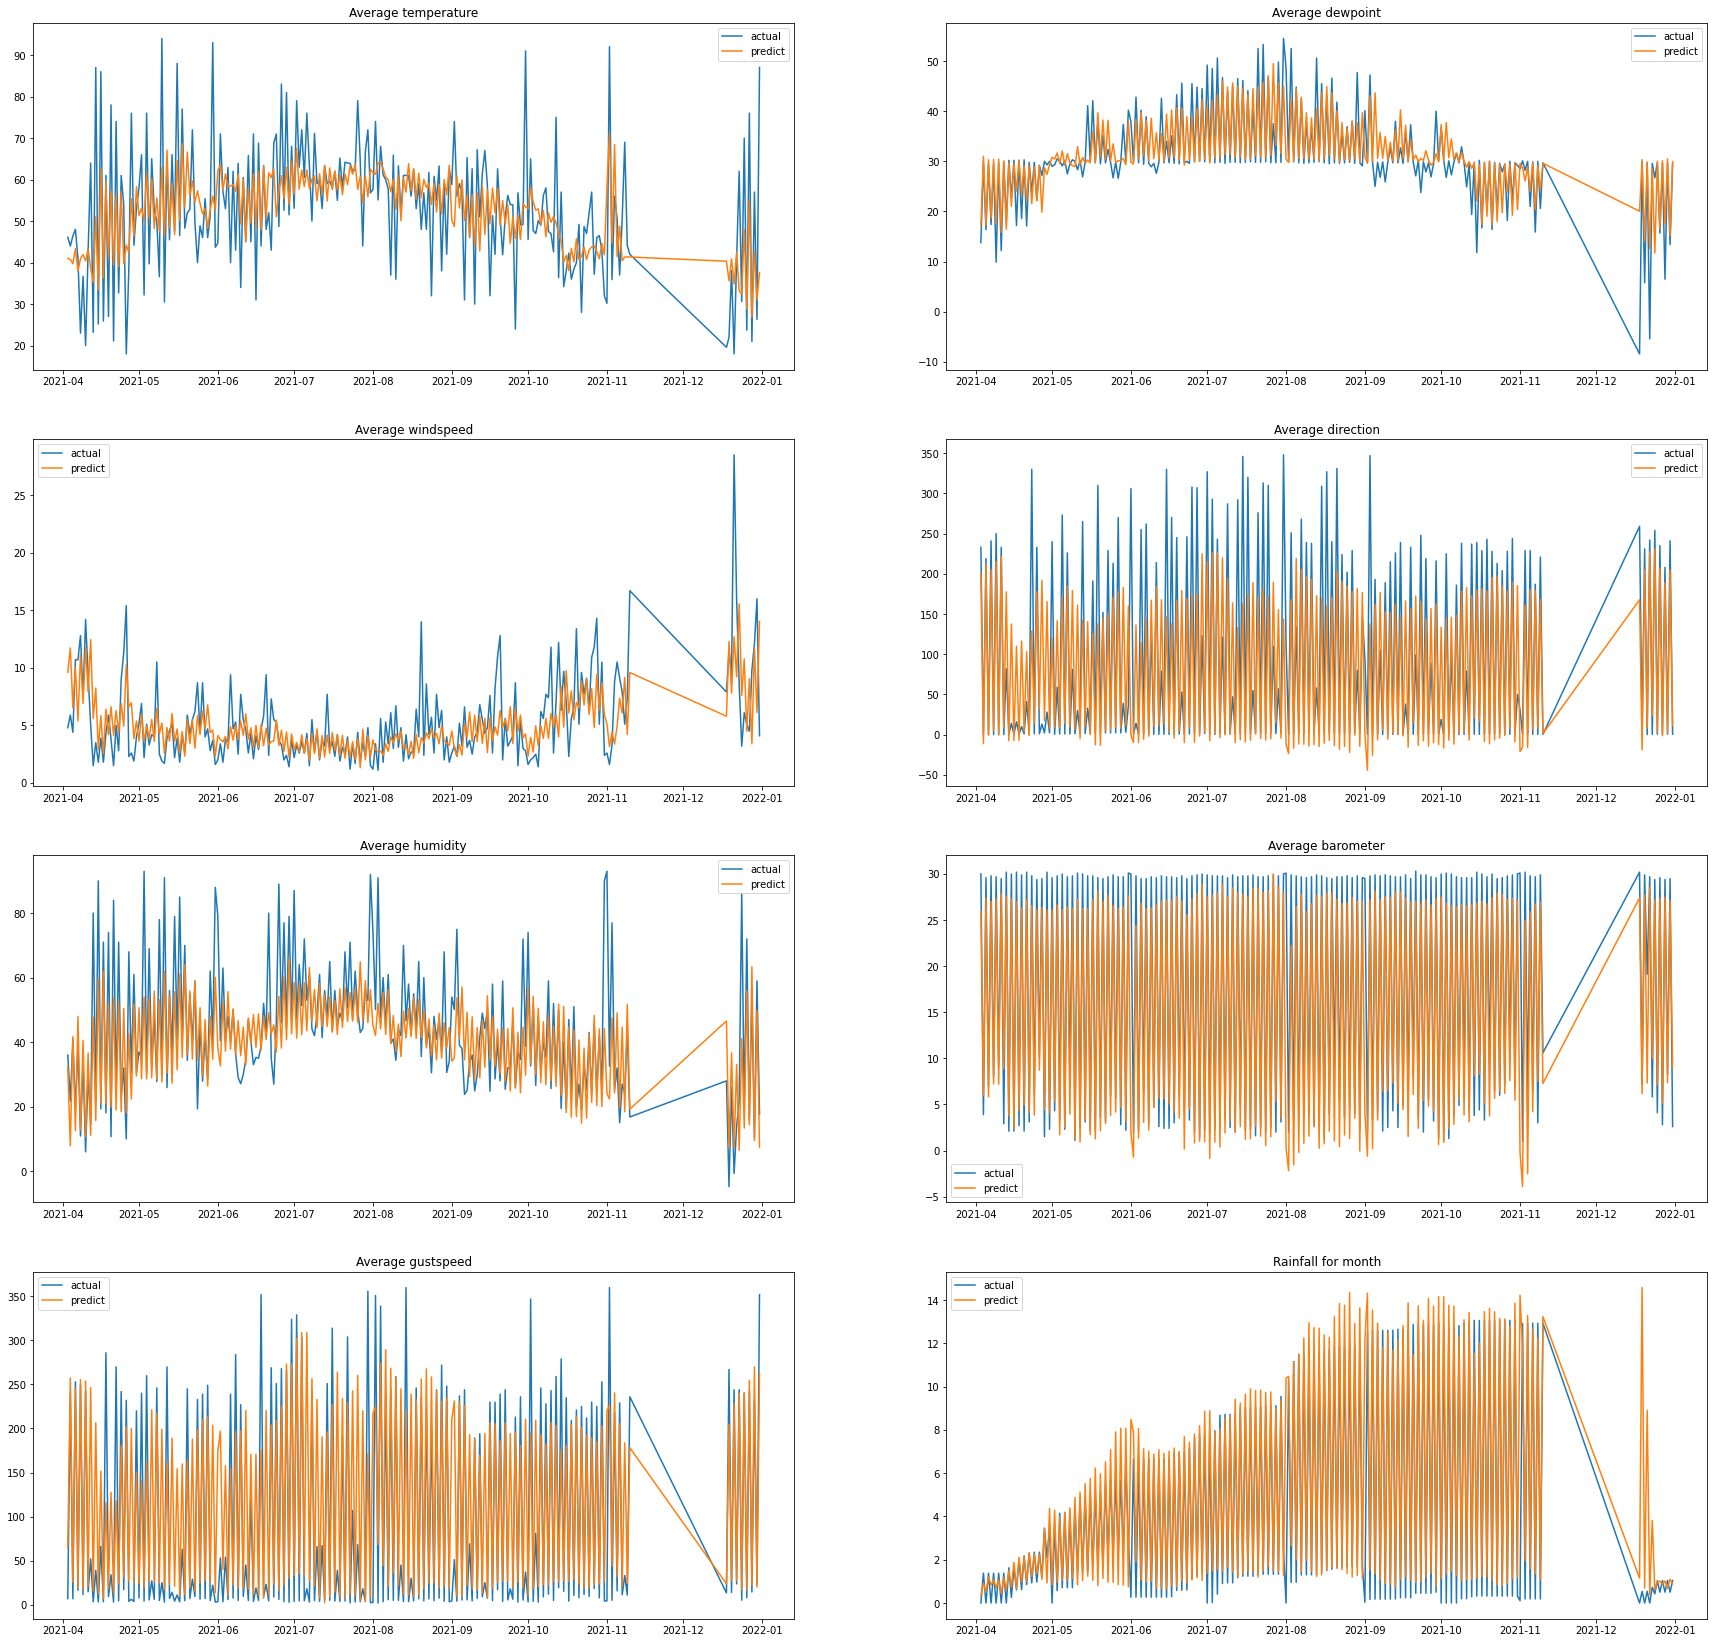

In [34]:
plot_evaluate_model(X_test, y_test, test_dates[n_input:], model4)

1/1 [==============================] - 0s 28ms/step


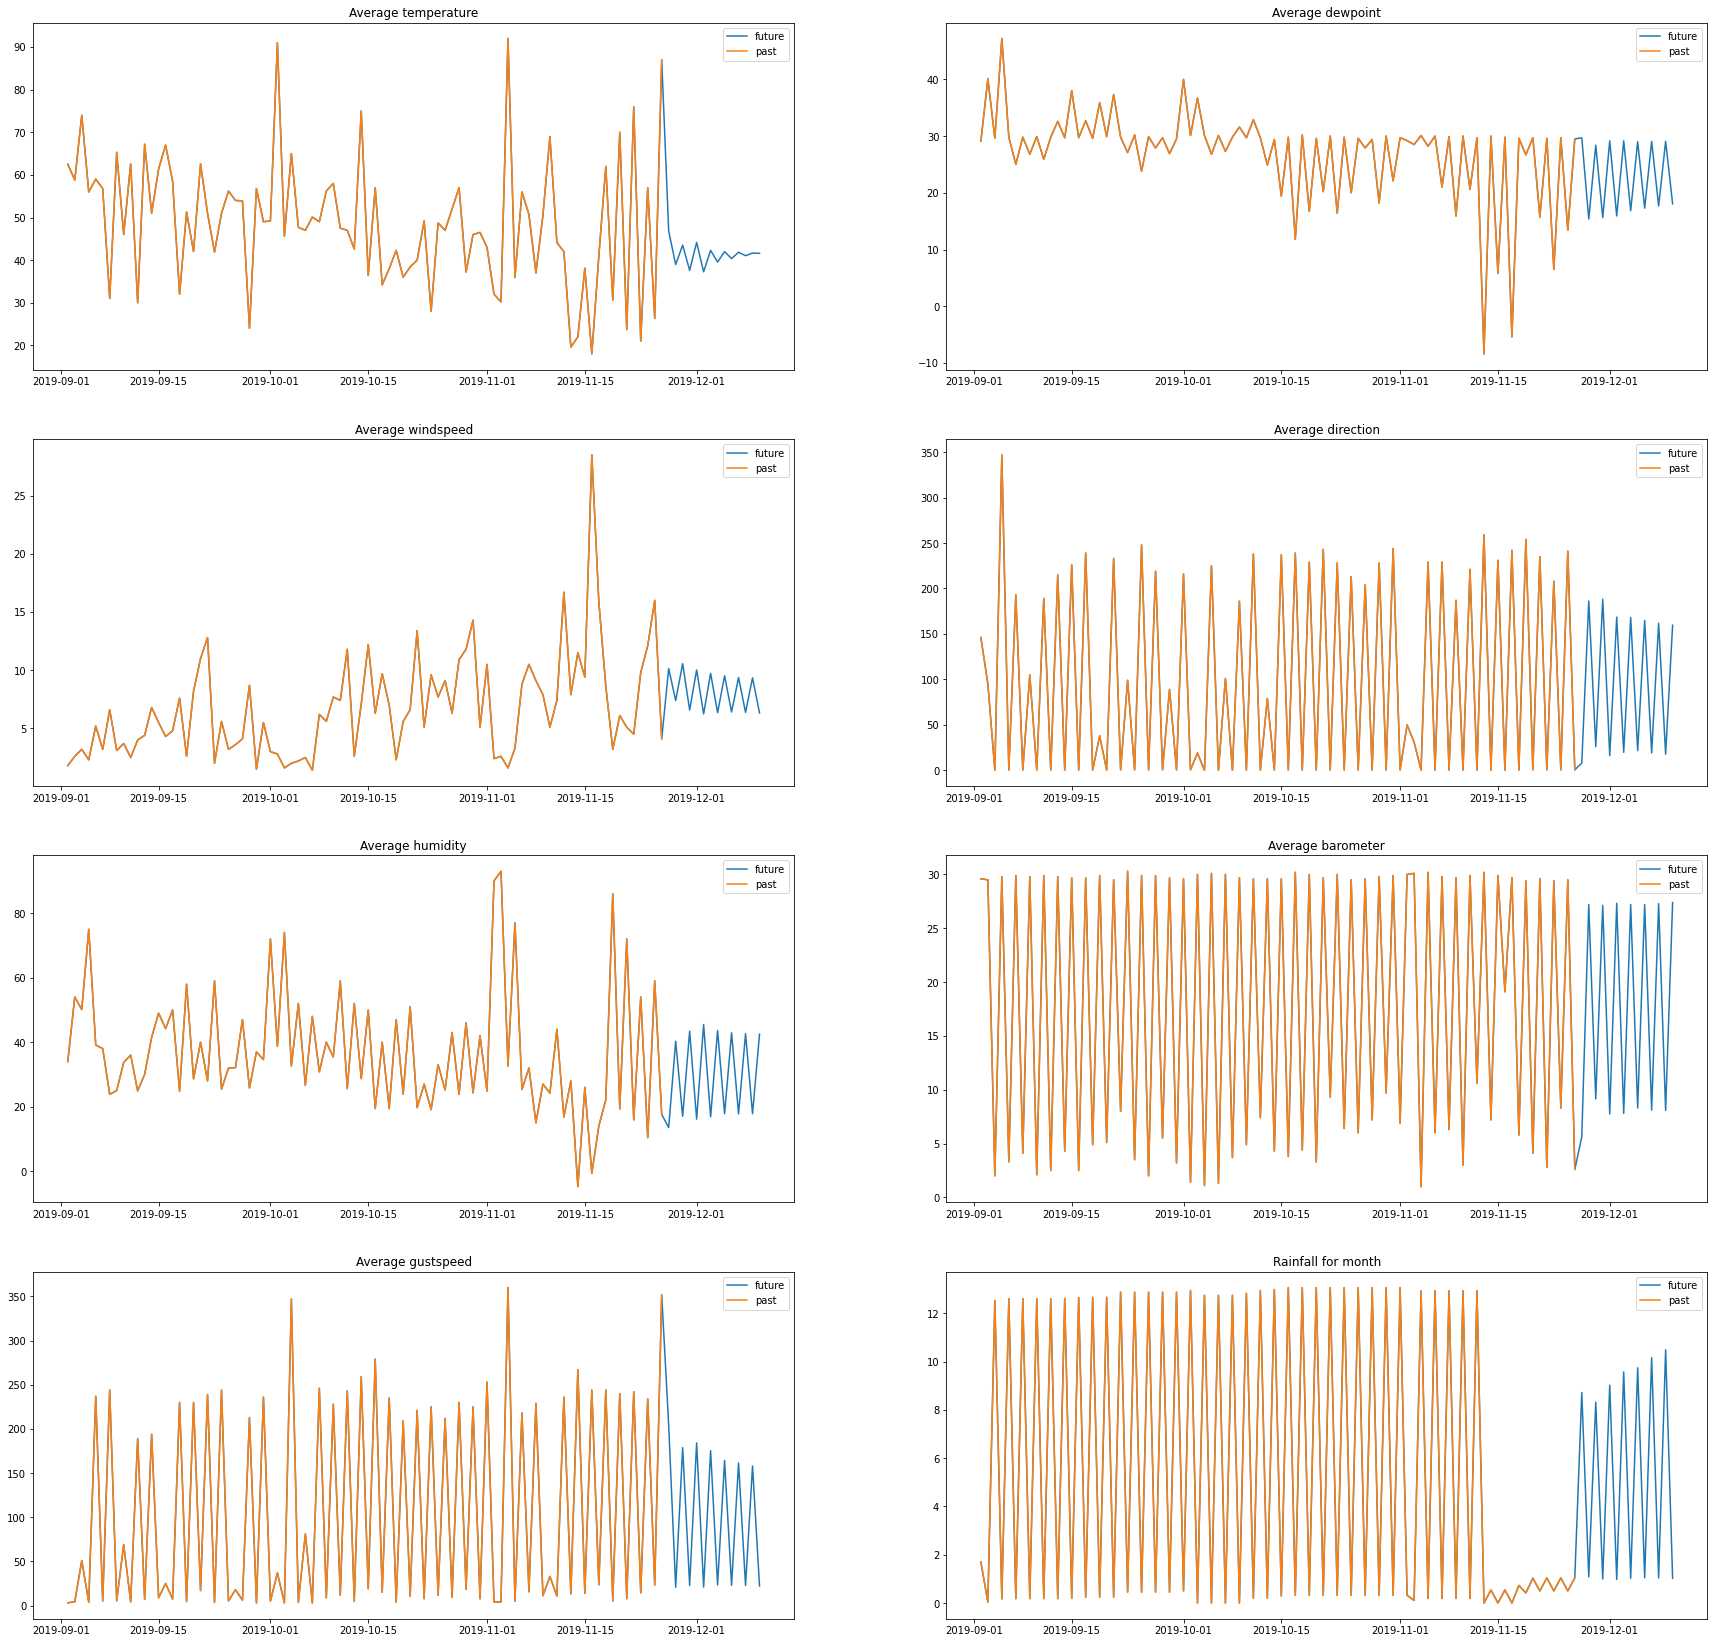

In [35]:
plot_forecasting(model4, X_test, y_test, train_dates[n_input:])

# Dự đoán theo batch (small demo)
Tương tự như dự đoán tuần tự chỉ khác ở chỗ không cần dùng lớp dense đầu ra 

In [147]:
def generate_batch_timeseries_data(sequence_data, n_past=21, n_future = 21):
    X = []
    y = []
    for i in range(len(sequence_data) - n_past - n_future):
        start = i
        center = i+n_past
        end = center+n_future
        X.append(sequence_data[start:center])
        y.append(sequence_data[center: end])
    return X, y

In [148]:
train_series = generate_batch_timeseries_data(train)
val_series = generate_batch_timeseries_data(val)
test_series = generate_batch_timeseries_data(test)

In [149]:
X_train = np.asarray(train_series[0])
y_train =  np.asarray(train_series[1])

X_val =  np.asarray(val_series[0])
y_val =  np.asarray(val_series[1])

X_test =  np.asarray(test_series[0])
y_test =  np.asarray(test_series[1])

In [150]:
X_train.shape, y_train.shape

((1659, 21, 8), (1659, 21, 8))

In [166]:
# Bidirectional LSTM
model5 = Sequential([
    # input shape == (None, 7, 8)
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], n_features)),
    #Conv1D(64, (8), activation='relu'), # giảm chiều khi đầu vào và đầu ra khác shape ví dụ in_shape = (None, 21,8), out_shape = (None, 14, 8) thì ta cần đưa 21 về thành 8 nhưng việc này ảnh hưởng khá nhiều đến kết quả 
    Dropout(0.2),
    LSTM(64, activation='relu',return_sequences=True),
    Dropout(0.2),
    LSTM(n_features, activation='relu',return_sequences=True),
])

model5.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
model5.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_39 (Bidirecti  (None, 21, 128)          37376     
 onal)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 21, 128)           0         
                                                                 
 lstm_119 (LSTM)             (None, 21, 64)            49408     
                                                                 
 dropout_44 (Dropout)        (None, 21, 64)            0         
                                                                 
 lstm_120 (LSTM)             (None, 21, 8)             2336      
                                                                 
Total params: 89,120
Trainable params: 89,120
Non-trainable params: 0
_________________________________________________

In [175]:
history5 = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25)

Epoch 1/25
52/52 [==============================] - 7s 139ms/step - loss: 0.5832 - root_mean_squared_error: 0.7637 - val_loss: 1.0707 - val_root_mean_squared_error: 1.0348
Epoch 2/25
52/52 [==============================] - 6s 125ms/step - loss: 0.5795 - root_mean_squared_error: 0.7613 - val_loss: 1.0705 - val_root_mean_squared_error: 1.0346
Epoch 3/25
52/52 [==============================] - 7s 128ms/step - loss: 0.5773 - root_mean_squared_error: 0.7598 - val_loss: 1.0959 - val_root_mean_squared_error: 1.0469
Epoch 4/25
52/52 [==============================] - 7s 133ms/step - loss: 0.5785 - root_mean_squared_error: 0.7606 - val_loss: 1.0521 - val_root_mean_squared_error: 1.0257
Epoch 5/25
52/52 [==============================] - 6s 125ms/step - loss: 0.5836 - root_mean_squared_error: 0.7639 - val_loss: 1.0630 - val_root_mean_squared_error: 1.0310
Epoch 6/25
52/52 [==============================] - 6s 120ms/step - loss: 0.5919 - root_mean_squared_error: 0.7694 - val_loss: 1.0738 - val_

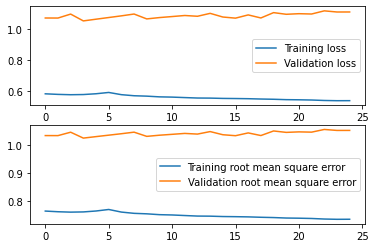

In [176]:
plot_loss_mse(history5)

In [177]:
y_pred = model5.predict(X_test)
RootMeanSquaredError()(y_pred, y_test)

7/7 [==============================] - 0s 35ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=1.0465568>

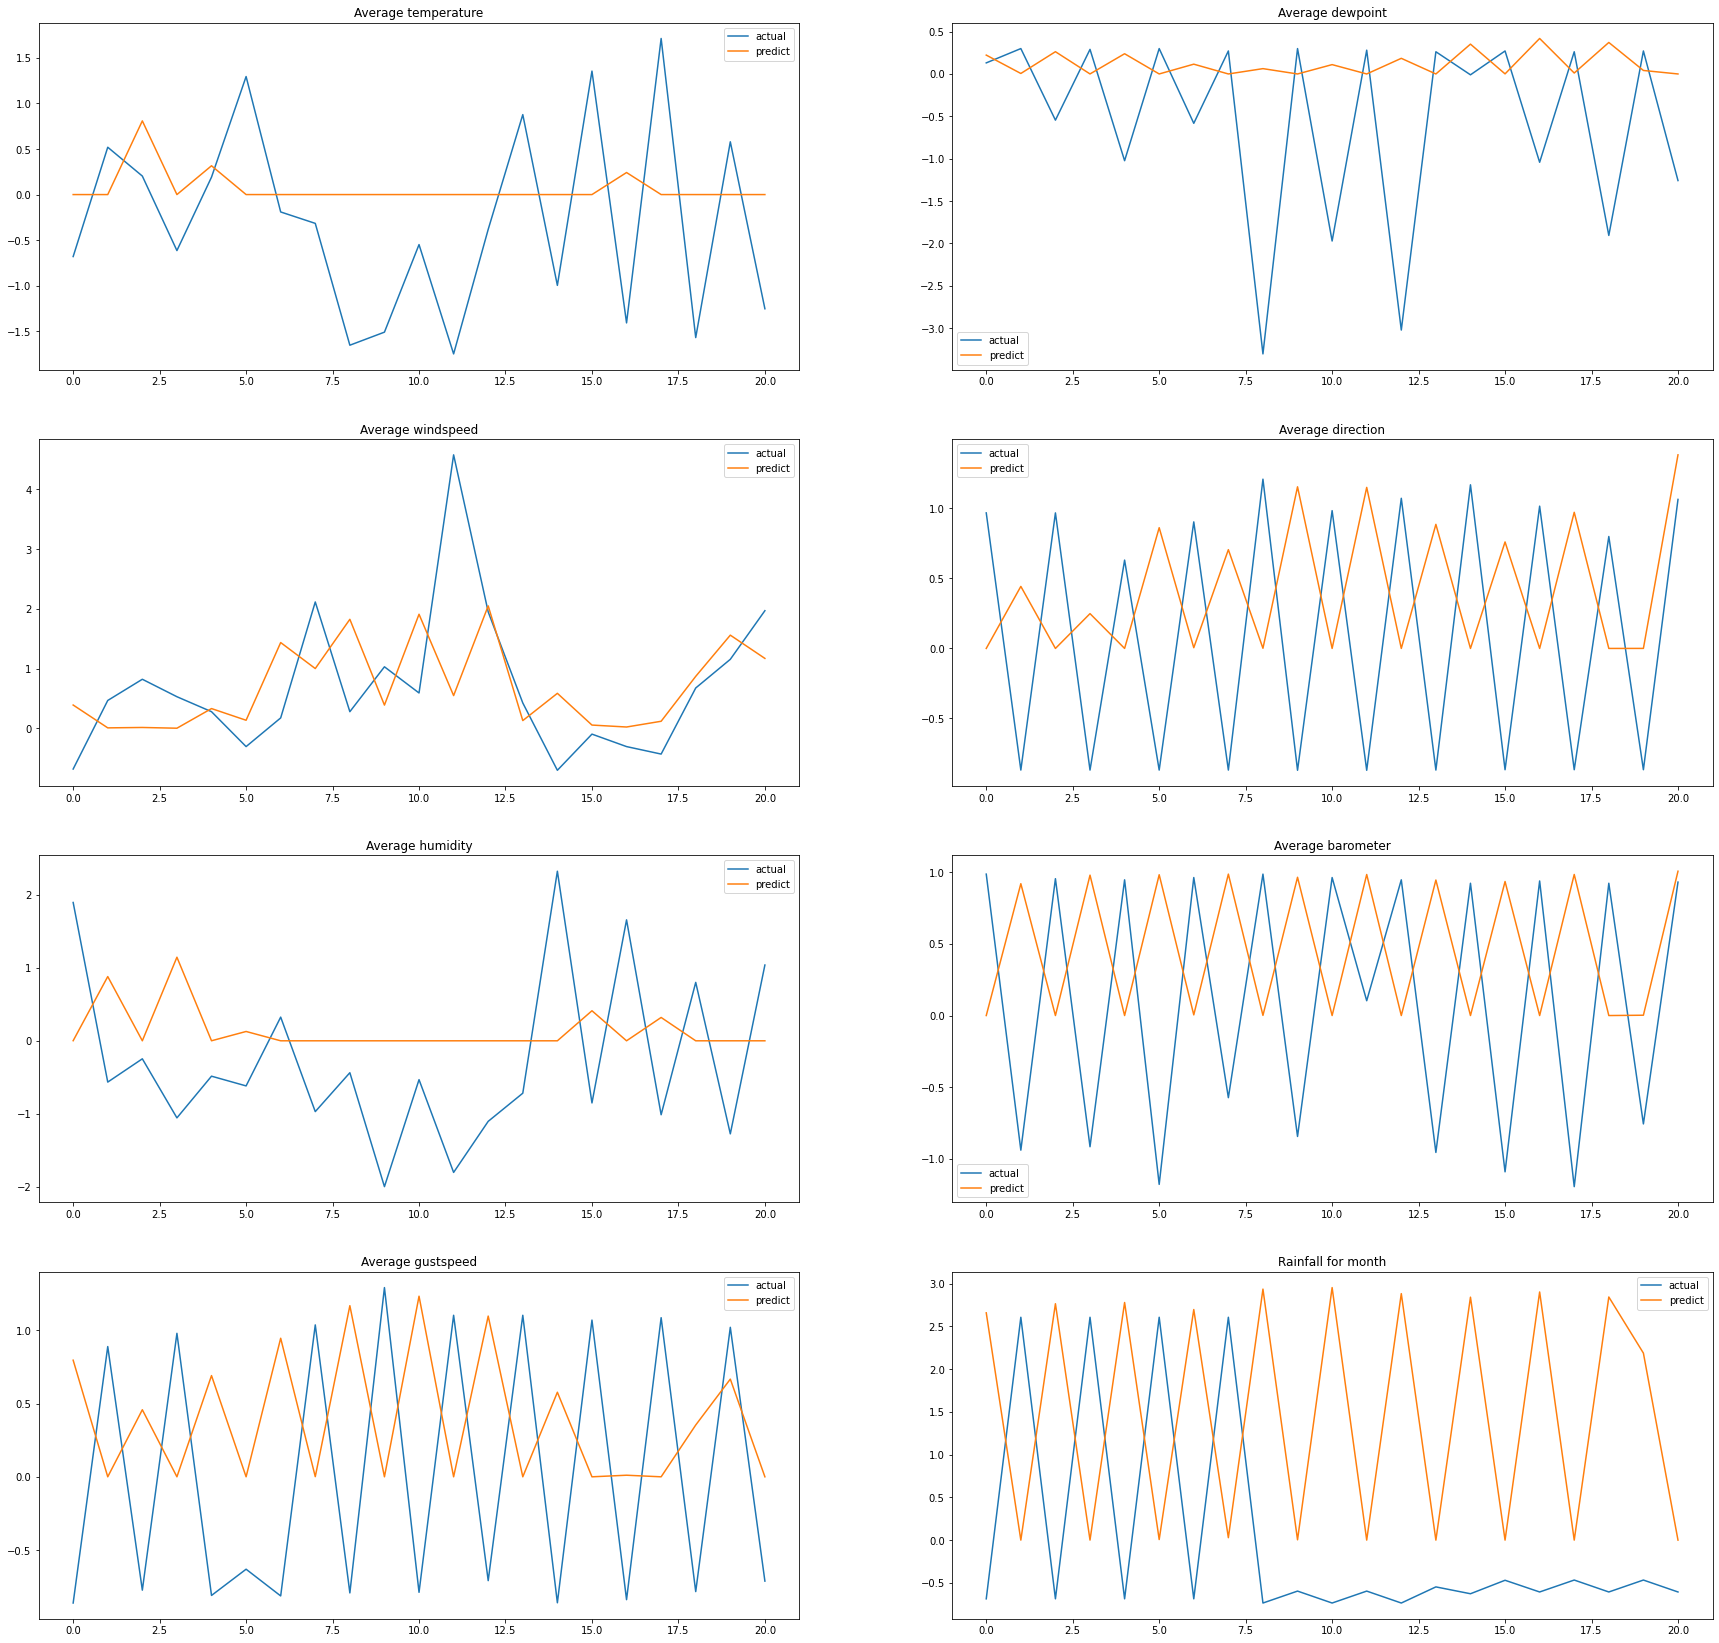

In [178]:
plt.figure(figsize=(30,60))
name_title = df_index.columns
for i in range(len(name_title)):
    plt.subplot(len(name_title), 2, i+1)
    plt.title(name_title[i])
    plt.plot(y_test[-1:,:,i][0], label='actual')
    plt.plot(y_pred[-1:,:,i][0], label='predict')
    plt.legend()
